In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D
from tensorflow.keras.models import Model

In [201]:
# Load the dataset

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

pd_dat = pd.read_csv('/content/drive/My Drive/datasets/train_fouroutputs2.csv', dtype=np.int64)
dataset = pd_dat.values


In [202]:
pd_dat.head()

,target value,a,b,c,d
0,460121000000000000,0,0,1,0
1,828641000000000000,1,0,0,0
2,894462000000000000,0,0,0,1
3,157132000000000000,0,0,1,0
4,382129000000000000,0,0,1,0


In [203]:
# Building train and test data splits

X_train, X_test, y_train, y_test = train_test_split(dataset[:, :1], dataset[:, 1:], test_size = 0.33)  # from 6th col labels col start
print(X_train.shape)   
print(y_train.shape) 

(524287, 1)
(524287, 4)


In [160]:
X_test[0]

array([999166000000000000])

In [144]:
# Assign training and testing inputs/outputs
# this thing goes in our fit function

# temp_train = np.transpose(X_train)
# temp_test = np.transpose(X_test)

temp_train = X_train
temp_test = X_test

# breaking 4 labels and storing them in seperate list
A_train, B_train, C_train, D_train = y_train[:, 0] , y_train[:, 1], y_train[:, 2], y_train[:, 3]
A_test, B_test, C_test, D_test = y_test[:, 0], y_test[:, 1], y_test[:, 2], y_test[:, 3]


In [205]:
# Build the input layers

from tensorflow.keras import Input, layers
import tensorflow as tf

shape_inputs = (1,)
temperature = Input(shape= shape_inputs, name = "temp")


In [206]:
# Now we will define list containing all the inputs of the model

list_inputs = temperature
x = list_inputs

In [207]:
# Use a logistic regression classifier for disease prediction
# Now we can define output layers and name them as well
xA = layers.Dense(1024, activation= 'relu',  name = "xA1")(x)
xA = layers.Dense(1024, activation= 'relu',  name = "xA2")(xA)
xA = layers.Dense(816, activation= 'relu',  name = "xA3")(xA)
xA = layers.Dense(816, activation= 'relu',  name = "xA4")(xA)
xA = layers.Dense(512, activation= 'relu',  name = "xA5")(xA)
xA = layers.Dense(256, activation= 'relu',  name = "xA6")(xA)
xA = layers.Dense(128, activation= 'relu',  name = "xA7")(xA)

xB = layers.Dense(1024, activation= 'relu',  name = "xB1")(x)
xB = layers.Dense(1024, activation= 'relu',  name = "xB2")(xB)
xB = layers.Dense(816, activation= 'relu',  name = "xB3")(xB)
xB = layers.Dense(816, activation= 'relu',  name = "xB4")(xB)
xB = layers.Dense(512, activation= 'relu',  name = "xB5")(xB)
xB = layers.Dense(256, activation= 'relu',  name = "xB6")(xB)
xB = layers.Dense(128, activation= 'relu',  name = "xB7")(xB)

xC = layers.Dense(1024, activation= 'relu',  name = "xC1")(x)
xC = layers.Dense(1024, activation= 'relu',  name = "xC2")(xC)
xC = layers.Dense(816, activation= 'relu',  name = "xC3")(xC)
xC = layers.Dense(816, activation= 'relu',  name = "xC4")(xC)
xC = layers.Dense(512, activation= 'relu',  name = "xC5")(xC)
xC = layers.Dense(256, activation= 'relu',  name = "xC6")(xC)
xC = layers.Dense(128, activation= 'relu',  name = "xC7")(xC)

xD = layers.Dense(1024, activation= 'relu',  name = "xD1")(x)
xD = layers.Dense(1024, activation= 'relu',  name = "xD2")(xD)
xD = layers.Dense(816, activation= 'relu',  name = "xD3")(xD)
xD = layers.Dense(816, activation= 'relu',  name = "xD4")(xD)
xD = layers.Dense(512, activation= 'relu',  name = "xD5")(xD)
xD = layers.Dense(256, activation= 'relu',  name = "xD6")(xD)
xD = layers.Dense(128, activation= 'relu',  name = "xD7")(xD)

A_pred = layers.Dense(1, activation= 'sigmoid',  name = "A")(xA)
B_pred = layers.Dense(1, activation= 'sigmoid',  name = "B")(xB)
C_pred = layers.Dense(1, activation= 'sigmoid',  name = "C")(xC)
D_pred = layers.Dense(1, activation= 'sigmoid',  name = "D")(xD)


In [208]:
# Create a list of all the outputs

list_outputs = [A_pred, B_pred, C_pred, D_pred]


In [209]:
# create the Model object
# finally we r initiaing end to end model predicitng the presence of 2 diseases by merely specifying the inputs and outputs
model = tf.keras.Model(inputs= list_inputs, outputs = list_outputs)


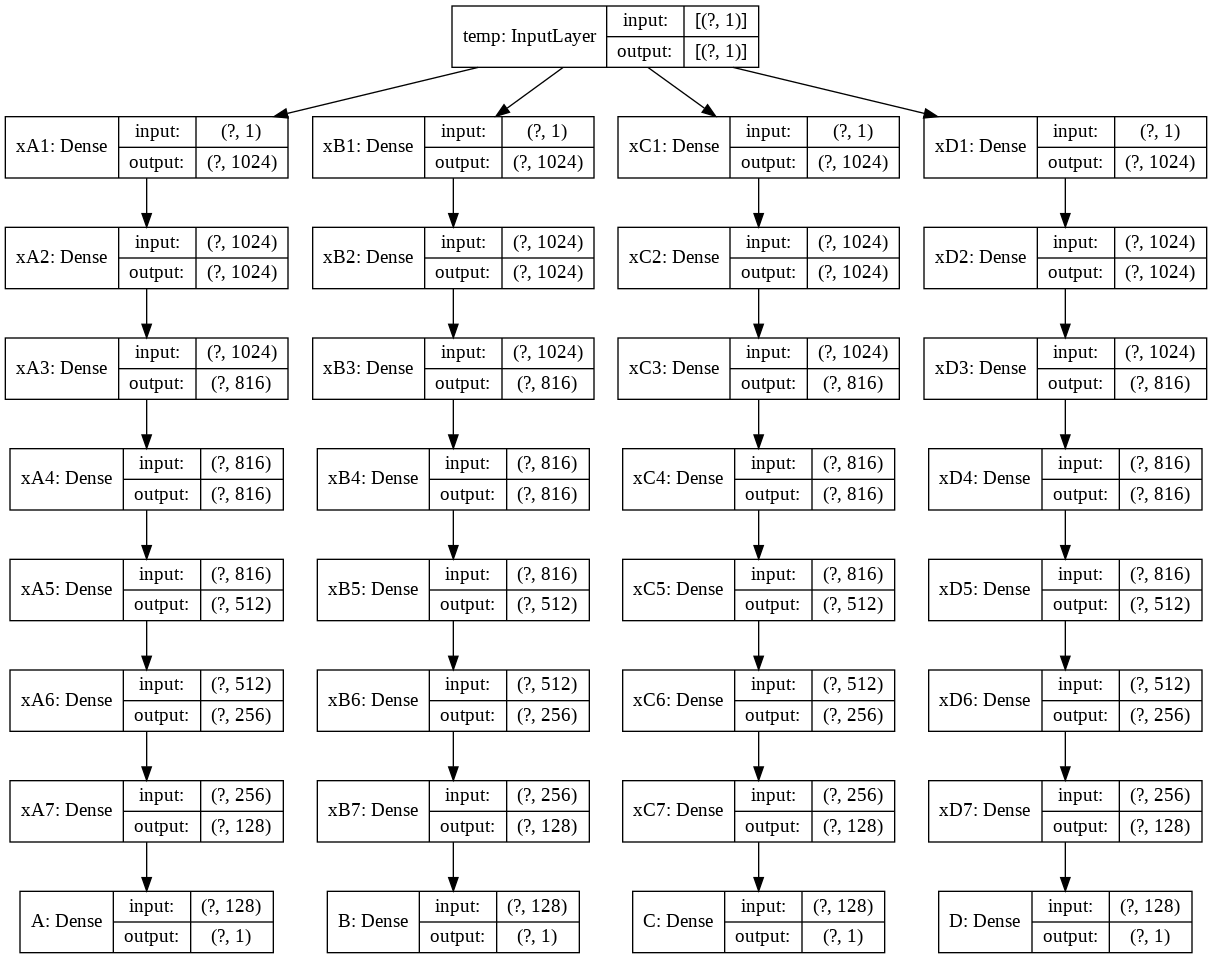

In [210]:
# Disply multi input/output model

tf.keras.utils.plot_model(model, 'Single_input_multi_output_model.png', show_shapes=True)


In [211]:
opt =  tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
model.compile(optimizer=opt,
              loss = {"A" : "binary_crossentropy",      
                      "B": "binary_crossentropy",
                      "C" : "binary_crossentropy",      
                      "D": "binary_crossentropy"}, 
              metrics = [["acc"], ["acc"], ["acc"], ["acc"]], loss_weights = [1., 0.2, 0.5, 0.6] )
          

In [212]:
# list/vector based:
inputs_train = temp_train

outputs_train = [A_train, B_train, C_train, D_train]

In [213]:
# We r passing training and testing data in the form of list
history = model.fit(inputs_train, outputs_train, 
                    epochs = 5, 
                    batch_size= 128,
                    shuffle = True,
                    verbose = True)

Epoch 1/12
4096/4096 [==============================] - 43s 11ms/step - loss: 116812658245632.0000 - A_loss: 27100371222528.0000 - B_loss: 36329144451072.0000 - C_loss: 26424131977216.0000 - D_loss: 26959094480896.0000 - A_acc: 0.7368 - B_acc: 0.7288 - C_acc: 0.7432 - D_acc: 0.7430
Epoch 2/12
4096/4096 [==============================] - 43s 10ms/step - loss: 2.2504 - A_loss: 0.5598 - B_loss: 0.5653 - C_loss: 0.5608 - D_loss: 0.5644 - A_acc: 0.7526 - B_acc: 0.7475 - C_acc: 0.7516 - D_acc: 0.7483
Epoch 3/12
4096/4096 [==============================] - 43s 10ms/step - loss: 2.2499 - A_loss: 0.5597 - B_loss: 0.5652 - C_loss: 0.5607 - D_loss: 0.5643 - A_acc: 0.7526 - B_acc: 0.7475 - C_acc: 0.7516 - D_acc: 0.7483
Epoch 4/12
4096/4096 [==============================] - 43s 10ms/step - loss: 2.2499 - A_loss: 0.5597 - B_loss: 0.5652 - C_loss: 0.5608 - D_loss: 0.5643 - A_acc: 0.7526 - B_acc: 0.7475 - C_acc: 0.7516 - D_acc: 0.7483
Epoch 5/12
4096/4096 [==============================] - 43s 10ms/s

In [142]:
# Evaluate the model

model.evaluate(temp_test, [A_test, B_test, C_test, D_test], verbose=2)
# we will provide list of test inputs and outputs

10814/10814 - 56s - loss: 1.2923 - A_loss: 0.5597 - B_loss: 0.5643 - C_loss: 0.5612 - D_loss: 0.5652 - A_acc: 0.7527 - B_acc: 0.7482 - C_acc: 0.7517 - D_acc: 0.7473


[1.2922894954681396,
 0.5596541166305542,
 0.5643422603607178,
 0.5612345933914185,
 0.5652400255203247,
 0.7527179718017578,
 0.7482414841651917,
 0.7517036199569702,
 0.7473369240760803]